# Shuffle iterativo en Blosc

## Definición e inicialización de los datos

In [8]:
%matplotlib inline

import pycblosc2 as cb2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycblosc2 as cb2
import time as t

KB = 1024
MB = 1024 * KB
GB = 1024 * MB

CHUNKSIZE = 2* 1000 * 1000
BLOSC_MAX_FILTERS = 5

data = np.arange(CHUNKSIZE, dtype=np.float64)
data_dest = np.arange(CHUNKSIZE, dtype=np.float64)

isize = CHUNKSIZE * data.dtype.itemsize
dsize = 0

cparams = cb2.blosc2_create_cparams(compcode=1, clevel=5, use_dict=0, typesize=8,
                                    nthreads=4, blocksize=0, schunk=None,
                                    filters=[0, 0, 0, 0, 1],
                                    filters_meta=[0, 0, 0, 0, 0])
dparams = cb2.blosc2_create_dparams(nthreads=1, schunk=None)

## Cálculo y representación de los ratios de compresión

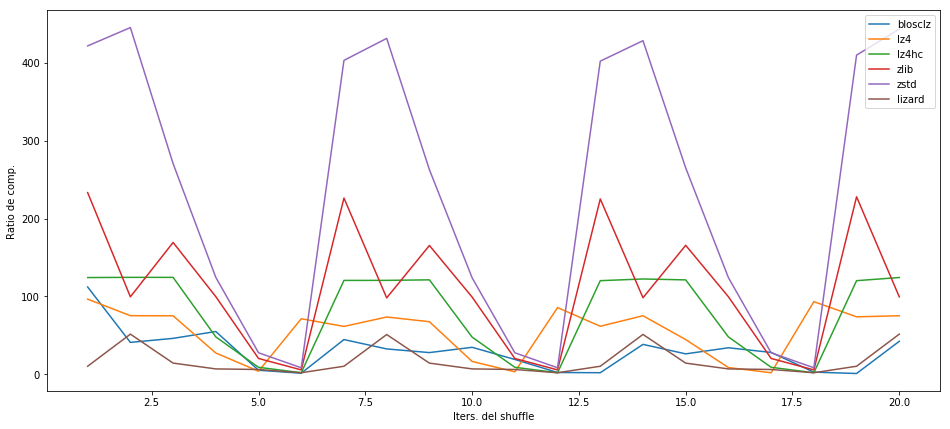

In [5]:
fig = plt.figure(figsize=(16, 7))

for code in (0, 1, 2, 4, 5, 6):
    cparams.compcode = code
    
    n = []
    ratio = []
    speed = []    
   
    for i in range(20):
        start = t.perf_counter()
        
        cparams.filters_meta[BLOSC_MAX_FILTERS - 1] = i;
        schunk = cb2.blosc2_new_schunk(cparams, dparams)
        
        nchunks = cb2.blosc2_append_buffer(schunk, isize, data)
        nbytes = schunk.nbytes
        cbytes = schunk.cbytes
        
        end = t.perf_counter()
        ttotal = end - start
        
        r = (1. * nbytes) / cbytes
        s = nbytes / (ttotal * MB)
        
        n.append(i+1)
        ratio.append(r)
        speed.append(s)
    
    plt.plot(n, ratio, label=cb2.blosc_compcode_to_compname(code)[1].decode("utf8"))
    
plt.ylabel("Ratio de comp.")
plt.xlabel("Iters. del shuffle")
plt.legend(loc = "upper right")
plt.show()